In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv")
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


1. visualizzare il numero totale di record presenti nel file




In [10]:
df.index.max()

5282

2. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente

In [28]:
df2 = df.groupby("nome_area", as_index=False)["numero_dosi"].count().sort_values("numero_dosi", ascending = False)
df2.loc[df2["nome_area"] == input("Inserisci la regione: ")]

Inserisci la regione: Lombardia


,nome_area,numero_dosi
8,Lombardia,264


3. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente

In [30]:
df2 = df.groupby("nome_area", as_index=False)["numero_dosi"].count().sort_values("numero_dosi", ascending = False)
a = input("Inserisci la regione: ")
df2.loc[if df2["nome_area"] != a]: print(df) else: print(df2["nome_area", "numero_dosi"])

SyntaxError: ignored

4. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente

In [65]:
df2 = df.groupby("nome_area", as_index=False)["numero_dosi"].sum().sort_values("numero_dosi", ascending = False)
df2.loc[df2["nome_area"] == input("Inserisci la regione: ")]

Inserisci la regione: Veneto


,nome_area,numero_dosi
20,Veneto,8088672


5. visualizzare il numero di vaccini per ogni fornitore


In [33]:
df2 = df.groupby("fornitore", as_index=False)["numero_dosi"].sum().sort_values("numero_dosi", ascending = False)
df2

,fornitore,numero_dosi
2,Pfizer/BioNTech,71327408
1,Moderna,15235940
3,Vaxzevria (AstraZeneca),11544591
0,Janssen,1846104


6. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini


In [98]:
df3 = df.groupby(["nome_area", "fornitore"], as_index=False).agg({'numero_dosi': sum}).sort_values("numero_dosi", ascending = False)
df3.loc[df3["nome_area"] == input("Inserisci la regione: ")]

Inserisci la regione: Lombardia


,nome_area,fornitore,numero_dosi
34,Lombardia,Pfizer/BioNTech,12089444
33,Lombardia,Moderna,2685369
35,Lombardia,Vaxzevria (AstraZeneca),2190389
32,Lombardia,Janssen,309487


7. visualizzare le informazioni dell'esercizio 6 con un grafico a barre


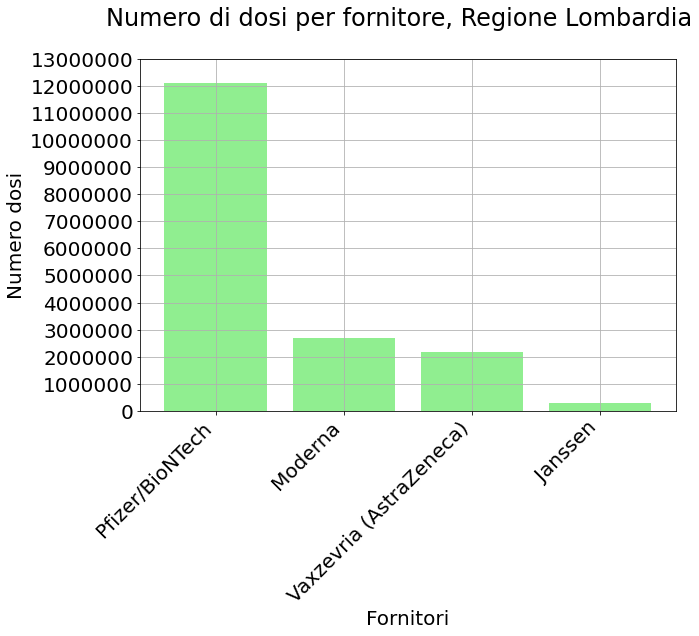

In [99]:
fig = plt.figure(figsize=(9.6,7.2))
ax = plt.axes()
plt.rcParams.update({"font.size" : 20})
fig.autofmt_xdate(rotation=45)
ax.bar(df3["fornitore"], df3["numero_dosi"], color = "lightgreen")
fig.suptitle("Numero di dosi per fornitore, Regione Lombardia")
ax.set_xlabel("Fornitori")
ax.set_ylabel("Numero dosi")
ax.set_ylim([0, 13000000])
ax.set_yticklabels(np.arange(0, 130000001, step=1000000))
ax.set_yticks(np.arange(0, 13000001, step=1000000))
ax.grid()
plt.show()

In [108]:
df3.loc[df3["nome_area"] == input("Inserisci la regione: ")]
#df3["numero_dosi"].sum()/df3["numero_dosi"]*100

Inserisci la regione: Lombardia


,nome_area,fornitore,numero_dosi
34,Lombardia,Pfizer/BioNTech,12089444
33,Lombardia,Moderna,2685369
35,Lombardia,Vaxzevria (AstraZeneca),2190389
32,Lombardia,Janssen,309487


8. visualizzare le informazioni dell'esercizio 6 con un grafico a torta
